In [16]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import numpy as np
import WLbackground_cosmic_stds as BG
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from getdist import plots, MCSamples, loadMCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

#from matplotlib import ticker, cm, patches, pyplot


path='/Users/weikanglin/Documents/Documents NCSU/Projects/3STDs/chains_new'

def shift_parameter_R(Oms, zstars, hs):
    temp =[]
    for Om, zstar, h in zip(Oms, zstars, hs):
        temp.append(np.sqrt(Om)*BG.fC_LCDM(zstar,Om,h))
    return np.array(temp)

GetDist Version: 1.1.2, Matplotlib version: 3.2.2


In [14]:
samples = loadMCSamples(path+'/base_plikHM_TTTEEE_lowl_lowE', settings={'ignore_rows':0.3});
p = samples.getParams() 
samples.addDerived(p.theta/100.0, name='theta_star', label=r'\theta_*')
samples.addDerived(shift_parameter_R(p.omegam, p.zstar, p.H0/100), name='Rshift', label='R')
samples.addDerived(p.zstar-p.zdrag, name='Deltaz', label='\Delta z')

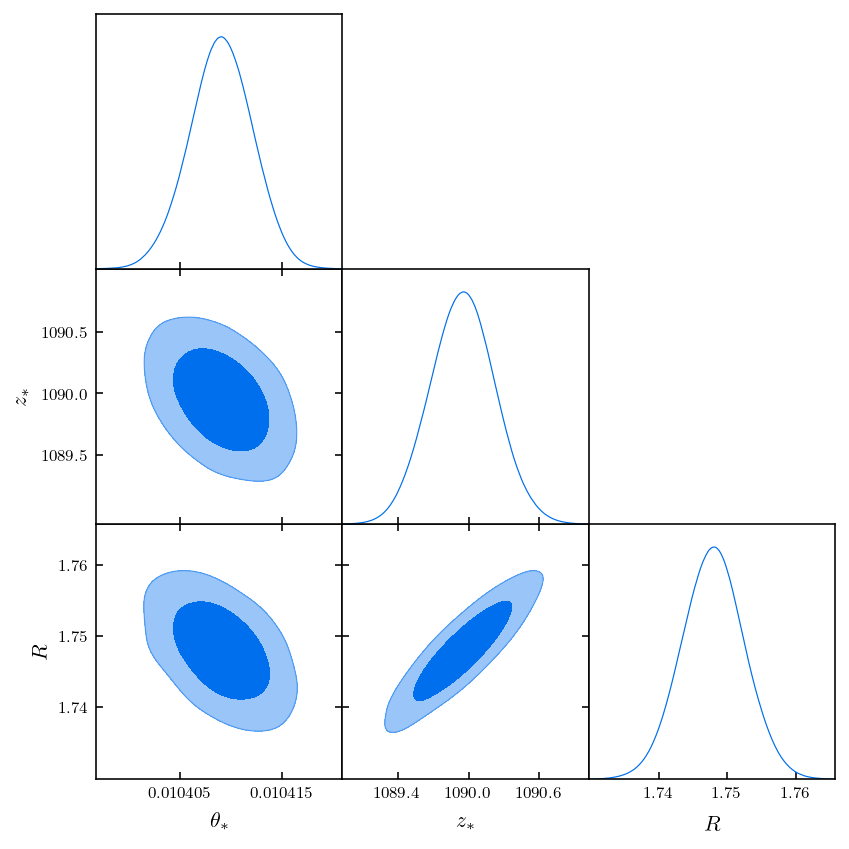

In [8]:
g = plots.getSubplotPlotter()
g.triangle_plot([samples],['theta_star','zstar','Rshift'], filled=True)

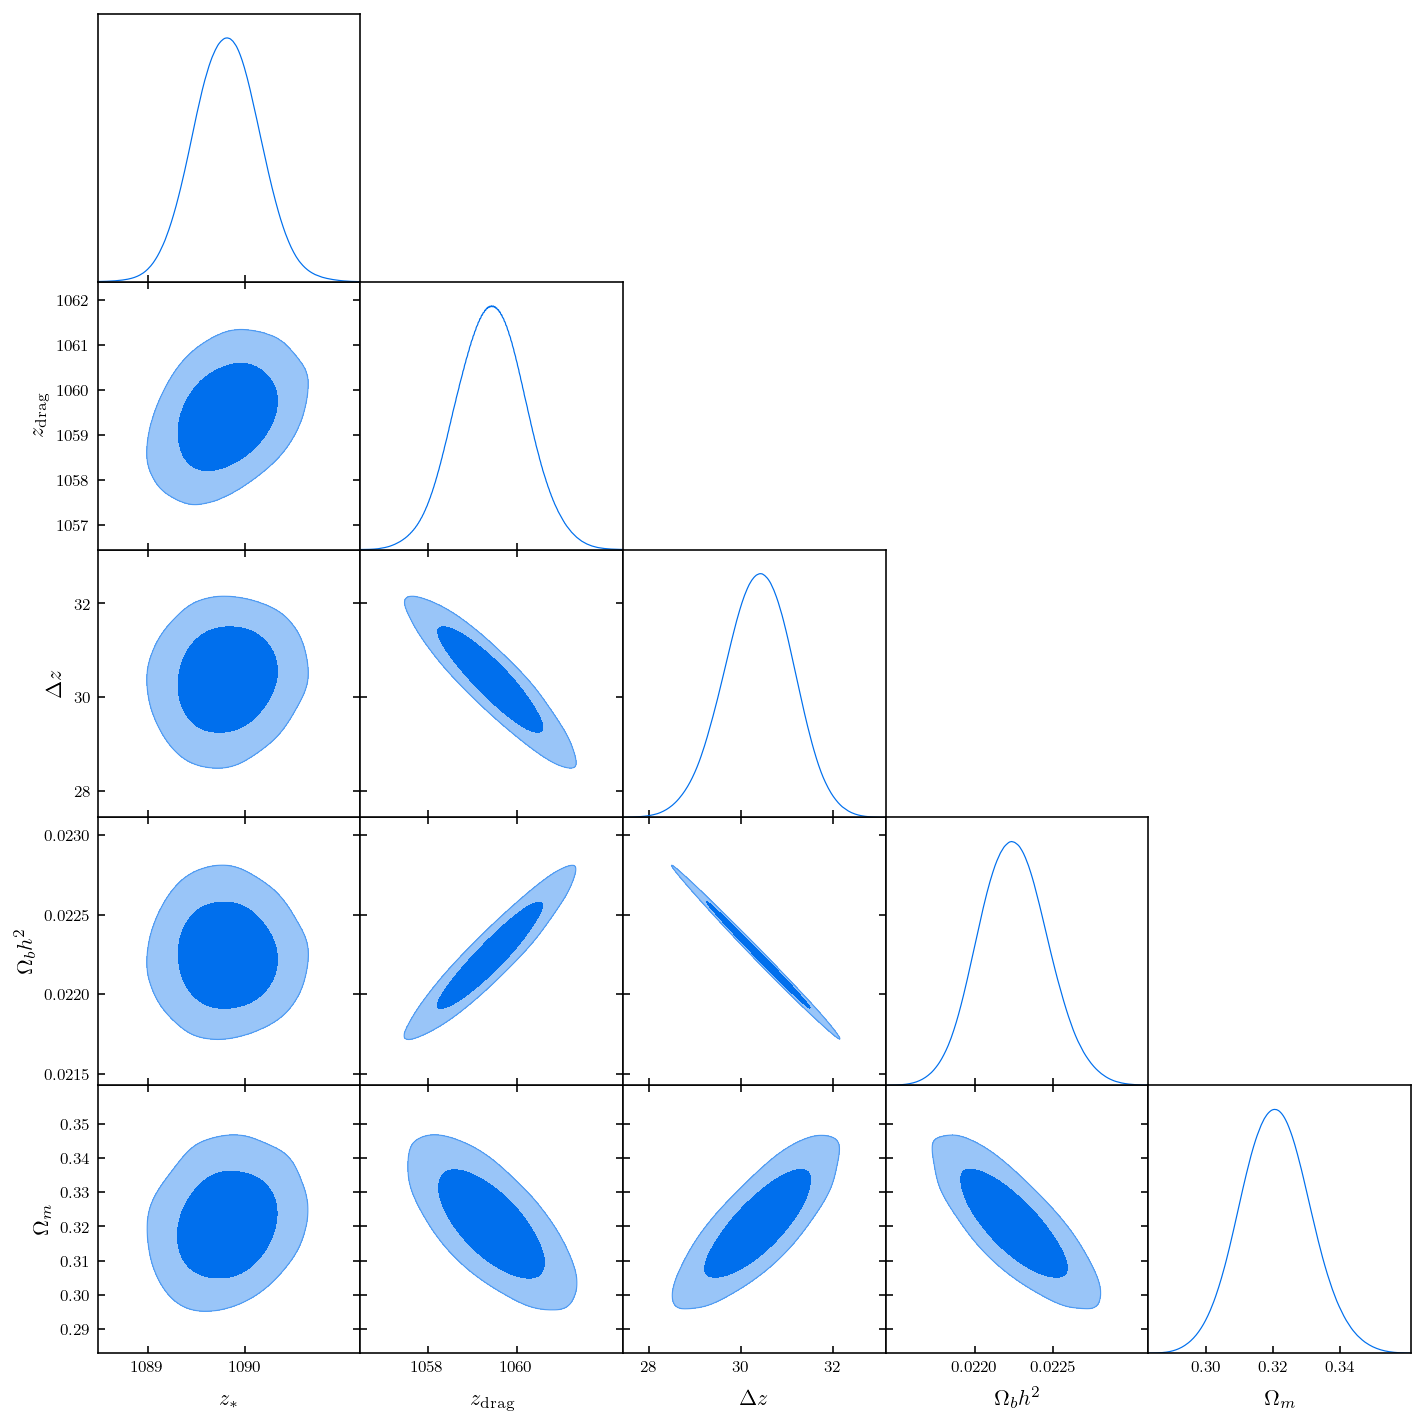

In [13]:
g = plots.getSubplotPlotter()
g.triangle_plot([samples],['zstar','zdrag','Deltaz','omegabh2','omegam'], filled=True)

In [11]:
stats = samples.getMargeStats()
theta_star_mean = stats.parWithName('theta_star').mean
zstar_mean = stats.parWithName('zstar').mean
Rshift_mean = stats.parWithName('Rshift').mean
means=[theta_star_mean,zstar_mean,Rshift_mean]
Cov=samples.cov(['theta_star','zstar','Rshift'])

np.savetxt('CMB_theta_means_wR.txt', means)
np.savetxt('CMB_theta_Cov_wR.txt', Cov)



In [15]:
samples.std(['Deltaz','zstar','zdrag'])

array([0.54452421, 0.27447628, 0.298498  ])

In [34]:
# ACT:
samples_ACT = loadMCSamples('/Volumes/My Passport for Mac/ACT/actpollite_likeprods_dr4.01/ACTPol_WMAP_lcdm', settings={'ignore_rows':0.3});
p = samples_ACT.getParams() 
samples_ACT.addDerived(p.theta/100.0, name='theta_star', label=r'\theta_*')
samples_ACT.addDerived(shift_parameter_R(p.omegam, p.zstar, p.H0/100), name='Rshift', label='R')
samples_ACT.addDerived(p.zstar-p.zdrag, name='Deltaz', label='\Delta z')

stats = samples_ACT.getMargeStats()
theta_star_mean = stats.parWithName('theta_star').mean
zstar_mean = stats.parWithName('zstar').mean
Rshift_mean = stats.parWithName('Rshift').mean
means=[theta_star_mean,zstar_mean]
Cov=samples_ACT.cov(['theta_star','zstar'])

np.savetxt('ACT_theta_means.txt', means)
np.savetxt('ACT_theta_Cov.txt', Cov)

In [33]:
print(samples.getMargeStats())
print(samples_ACT.getMargeStats())

Marginalized limits: 0.68; 0.95; 0.99

parameter      mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
omegabh2       2.2359750E-02  1.4879590E-04  2.2211680E-02  2.2509480E-02  two    2.2069970E-02  2.2651630E-02  two    2.1976450E-02  2.2738570E-02  two     \Omega_b h^2
omegach2       1.2020024E-01  1.3661348E-03  1.1884580E-01  1.2155680E-01  two    1.1752500E-01  1.2289350E-01  two    1.1671910E-01  1.2375630E-01  two     \Omega_c h^2
theta          1.0409036E+00  3.0954156E-04  1.0405990E+00  1.0412110E+00  two    1.0402810E+00  1.0414950E+00  two    1.0401060E+00  1.0416830E+00  two     100\theta_{MC}
tau            5.4445094E-02  7.8748597E-03  4.6358137E-02  6.1437498E-02  two    3.9424200E-02  7.0980050E-02  two    3.4705960E-02  7.7609350E-02  two     \tau
logA           3.0447352E+00  1.5912758E-02  3.0292650E+00  3.0600840E+00  two    3.0144320E+00  3.0768420E+00  two    3.0033910E+